In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


L'un des principes fondamentaux du système de trading des Tortues repose sur le suivi de tendance. Les Tortues cherchaient à identifier les mouvements de prix à long terme et à profiter de ces tendances pour générer des bénéfices.
Pour déterminer la tendance, les Tortues utilisaient les moyennes mobiles et les canaux de prix. L'objectif était de suivre la tendance jusqu'à ce qu'il y ait des signes clairs de renversement et de capturer une partie importante des gains potentiels offerts par les marchés en tendance.

Achat : lorsque le prix dépasse le plus haut des 20 derniers jours (canal de Donchian) et que la SMA20 est supérieure à la SMA55.

Vente à découvert : lorsque le prix tombe en dessous du plus bas des 20 derniers jours (canal de Donchian) et que la SMA20 est inférieure à la SMA55.



In [4]:
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [6]:
data = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)

In [8]:
#On crée une colonne buy et sell et de les initialiser à 0 et on remplacera le 0
#par quelque chose selon la situation

data['Buy'] = np.zeros(len(data))
data ['Sell'] = np.zeros(len(data))
#ça va étre la ligne horizontale en rouge

In [10]:
#On crée une colonne rolling max et rollin min en utilisant la fonction rolling et une fenétre de 28 jours
#pour lesquels on cherche le min et le max

#la fonction shift sert à décaler le signal de 1 jour pour éviter que 
#le signal bleu soit entre son minimum et son max sinon on ne vendrait jamais ou achèterait jamais de bitcoin

data['RollingMax'] = data['Close'].shift(1).rolling(window=28).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window=28).min()

#Boolean indexing pour savoir quand acheter ou vendre
#il écrit 1 ou -1 dans les colonnes buy et sell que nous avons initialisé
data.loc[ data['RollingMax'] < data['Close'], 'Buy'] = 1
data.loc[ data['RollingMin'] > data['Close'], 'Sell'] = -1

#Si max de la moyenne mobile des 28 derniers jours est inférieure au prix du marché on achète
#Si min de la moyenne mobile des 28 derniers jours est supérieure au prix du marché on vend

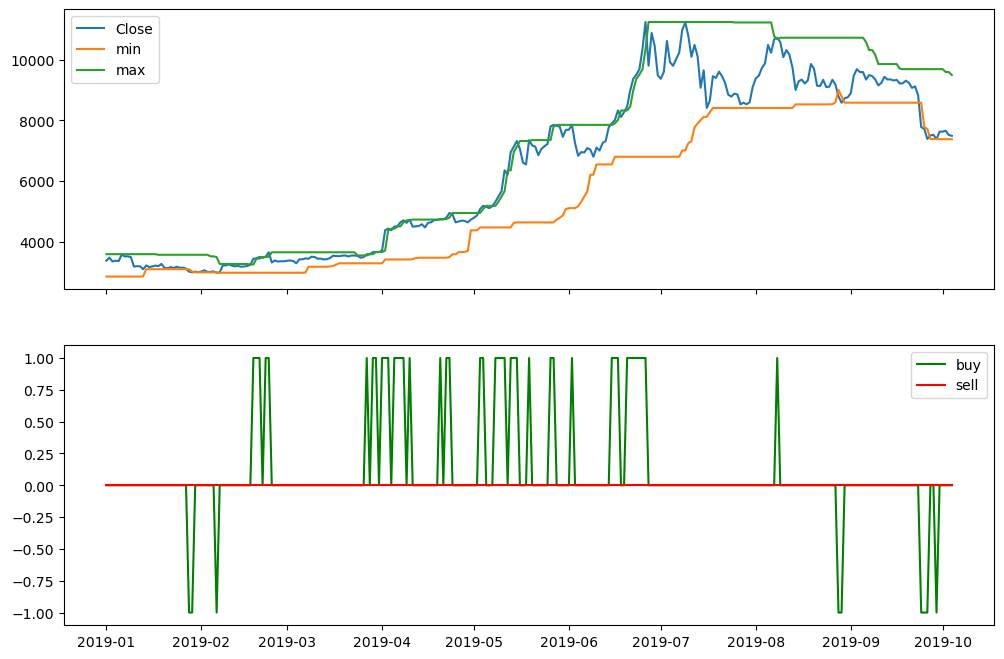

In [13]:
#Création du graphique
start= '2019'
end= '2019'

fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True) 
#share x pour dire que les sous figures se partagent l'axe x 
#plt.figure(figsize=(12, 8) )
#plt.subplot(211)
ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].legend(['Close', 'min' , 'max'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['buy', 'sell'])



Et voilà